### Prueba 2

##### En un galpón se tiene una temperatura de 18 grados centígrados, y una humedad de aproximadamente 22 grados centígrados. Según estos valores determine a que velocidad debe estar funcionando el motor.


#### Reglas a considerar

<img src="reglas.png"/>

#### Desarrollo

##### Importamos las librerias numpy, skyfuzzy

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings("ignore")

###### Configuramos los rangos de la temperatura , humedad  ,rpm del  motor

In [9]:
temperatura = ctrl.Antecedent(np.arange(1, 61, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 61, 1), 'humedad')
rpm = ctrl.Consequent(np.arange(0, 61, 1), 'rpm')

#### Definición de los descriptores de las variables de entrada y salida

In [15]:
temperatura['Baja'] = fuzz.trapmf(temperatura.universe, [0, 0, 10, 20])
temperatura['Media'] = fuzz.trimf(temperatura.universe, [20, 35, 50])
temperatura['Alta'] = fuzz.trapmf(temperatura.universe, [40, 60, 70, 70])

humedad['Baja'] = fuzz.trapmf(humedad.universe, [0, 0, 10, 20])
humedad['Media'] = fuzz.trimf(humedad.universe, [10, 40, 60])
humedad['Alta'] = fuzz.trapmf(humedad.universe, [50, 70, 100, 100])


rpm['Baja'] = fuzz.trapmf(rpm.universe, [0, 0, 10, 20])
rpm['Media'] = fuzz.trimf(rpm.universe, [10, 30, 45])
rpm['Alta'] = fuzz.trapmf(rpm.universe, [40, 55, 100, 100])

### Representación gráfica de la función de pertenencia de Entrada

#### Temperatura

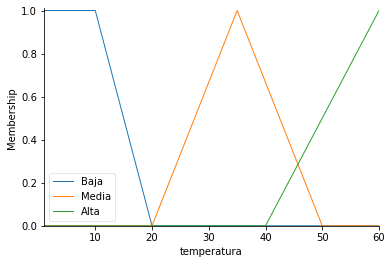

In [16]:
temperatura.view()

#### Humedad

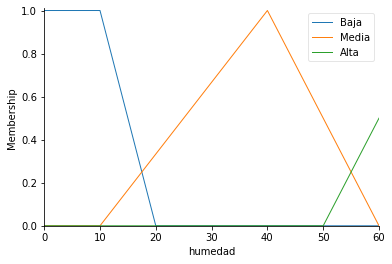

In [17]:
humedad.view()

### Funciones de Pertinencia de Salida

#### RPM del Motor

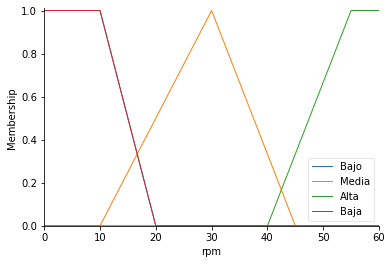

In [18]:
rpm.view()

### Formando la Base de Reglas

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2940c2a0bb0>)

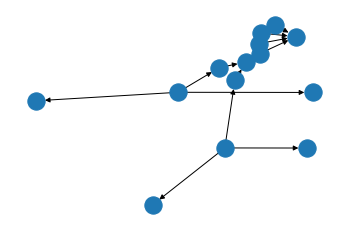

In [19]:
rule1  = ctrl.Rule(temperatura['Baja'] & humedad['Alta'], rpm['Baja'])
rule2  = ctrl.Rule(temperatura['Media'] & humedad['Alta'], rpm['Media'])
rule3  = ctrl.Rule(temperatura['Alta'] & humedad['Alta'], rpm['Media'])
rule4  = ctrl.Rule(temperatura['Baja'] & humedad['Media'], rpm['Baja'])
rule5  = ctrl.Rule(temperatura['Media'] & humedad['Media'], rpm['Baja'])
rule6  = ctrl.Rule(temperatura['Alta'] & humedad['Media'], rpm['Media'])
rule7  = ctrl.Rule(temperatura['Baja'] & humedad['Baja'], rpm['Baja'])
rule8  = ctrl.Rule(temperatura['Media'] & humedad['Baja'], rpm['Baja'])
rule9  = ctrl.Rule(temperatura['Alta'] & humedad['Baja'], rpm['Alta'])

rule1.view()

La velocidad que funciona el motor es  : 
9.508771929824562


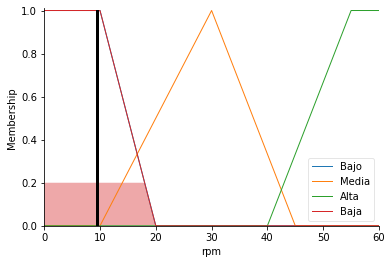

In [20]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['temperatura'] = 18
tipping.input['humedad'] = 22
print ('La velocidad que funciona el motor es  : ')
tipping.compute()
print (tipping.output['rpm'])
#s=float(tipping.output['riesgo'])
#session.write_transaction(neo4j.crear_nodo, s, )
rpm.view(sim=tipping)

##### Aplicamos el metodo del centroide Defuzzyficación

#### Cálculo de defuzzyfication con área

<img src="centroide.png">

#### Calculo del centroide


<div class="alert alert-danger">
<div>

 <font color='black'>
 $ Centroid =
  \begin{array}{ll}
      C1*A1+C2*A2 \over A(total)
  \end{array}$
  ---
  ---
$ Centroid=
\begin{align}
\frac{(9*5.4)+(18.66*0.3)}{8.4}  
\end{align}
$  

$ Centroid=
\begin{align}
6.38
\end{align}
$  

#### Cálculo de Computación de Defuzzyfication

In [25]:
tipping.compute()
prediccion_final = tipping.compute()
prediccion_final = tipping.output['rpm']
print ("Cálculo de resultados computacionales = %.2f" % prediccion_final)

Cálculo de resultados computacionales = 9.51


#### Cálculo de precisión y error para comparar el conteo manual con la computación

In [27]:
outputmanual = 9.51
if prediccion_final<outputmanual:
    precision = prediccion_final*100/outputmanual ## akurasi jika nilai komputasi dibawah manual
else:
    precision=(outputmanual/prediccion_final)*100
error=100-precision
print ("Precision = %.2f" % precision + " %")
print ("Error = %.2f" % error  + " %")

Precision = 99.99 %
Error = 0.01 %


#### Visualización de predicción final


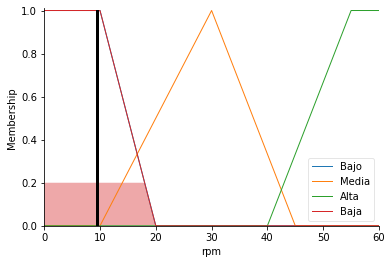

In [28]:
rpm.view(sim=tipping)